Sign Languange Recognizer using CNN Model

Install and Import Required Libraries

In [1]:

!pip install -q kaggle


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Dataset from Kaggle

In [9]:
import kagglehub


path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sign-language-mnist


Load and Preprocess the Data

In [10]:
# Load the training and test datasets
# Using the provided Kaggle dataset path
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

# Separate features and labels
x_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize image data (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN: (28, 28, 1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 25)
y_test_cat = to_categorical(y_test, 25)

 Build the CNN Model (Computer Vision)

In [12]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(25, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

 Train the CNN Model

In [13]:
history = cnn_model.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test_cnn, y_test_cat))


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.3321 - loss: 2.2411 - val_accuracy: 0.8215 - val_loss: 0.5524
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8838 - loss: 0.3584 - val_accuracy: 0.9052 - val_loss: 0.3004
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9651 - loss: 0.1238 - val_accuracy: 0.9098 - val_loss: 0.2923
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9789 - loss: 0.0694 - val_accuracy: 0.9066 - val_loss: 0.3072
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9888 - loss: 0.0439 - val_accuracy: 0.9276 - val_loss: 0.2950
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9145 - val_loss: 0.2940
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9007 - val_loss: 0.3697
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9943 - loss: 0.0217 - 

Evaluate the CNN Model

In [14]:
test_loss, test_accuracy = cnn_model.evaluate(x_test_cnn, y_test_cat)
print(f"Test Accuracy (CNN): {test_accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9174 - loss: 0.4179
Test Accuracy (CNN): 92.04%


ANN Model (for comparison)

In [15]:
#  input for ANN
x_train_ann = x_train.reshape(-1, 784)
x_test_ann = x_test.reshape(-1, 784)

ann_model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,081 (926.10 KB)

 Trainable params: 237,081 (926.10 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train ANN
ann_model.fit(x_train_ann, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test_ann, y_test_cat))

# Evaluate ANN
loss_ann, acc_ann = ann_model.evaluate(x_test_ann, y_test_cat)
print(f"Test Accuracy (ANN): {acc_ann * 100:.2f}%")


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1894 - loss: 2.7020 - val_accuracy: 0.4958 - val_loss: 1.6167
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5008 - loss: 1.4978 - val_accuracy: 0.6029 - val_loss: 1.2831
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6152 - loss: 1.1399 - val_accuracy: 0.6634 - val_loss: 1.0568
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6949 - loss: 0.9161 - val_accuracy: 0.6672 - val_loss: 1.0193
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7323 - loss: 0.7765 - val_accuracy: 0.7110 - val_loss: 0.8556
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7751 - loss: 0.6435 - val_accuracy: 0.7352 - val_loss: 0.8023
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8080 - loss: 0.5630 - val_accuracy: 0.7393 - val_loss: 0.8345
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8341 - loss: 0.4813 - val_accuracy: 

Predict and Visualize a Sample

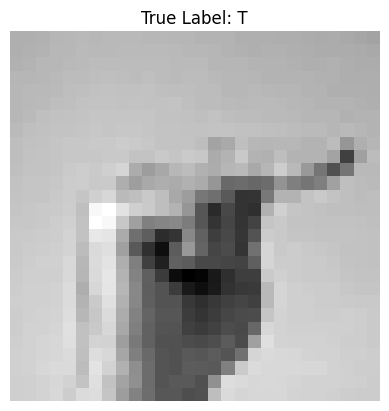

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Label: G


In [17]:
import random

index = random.randint(0, len(x_test_cnn))
sample = x_test_cnn[index]

plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title("True Label: " + chr(y_test[index] + 65))
plt.axis('off')
plt.show()

prediction = cnn_model.predict(sample.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {chr(predicted_label + 65)}")


Webcam to Predict in Real Time


In [23]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import PIL.Image
import io
import cv2
import numpy as np
from base64 import b64decode

def capture_image():
    # JavaScript to capture image from webcam
    js = Javascript('''
    async function captureImage() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        // Request webcam permission
        const stream = await navigator.mediaDevices.getUserMedia({video: true})
            .catch(err => {
                console.error("Error accessing webcam:", err);
                alert("Please grant webcam permission to use this feature.");
                return null;
            });

        // Check if permission was granted
        if (!stream) {
            return null;
        }

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to match the video stream
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Create a Promise that resolves with the captured image
        const result = await new Promise((resolve) => {
            capture.onclick = () => {
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);
                stream.getTracks().forEach(track => track.stop());
                video.remove();
                capture.remove();
                resolve(canvas.toDataURL('image/png'));
            };
        });

        return result;
    }
    ''')
    display(js)
    data = eval_js('captureImage()')

    # Handle case where permission was denied and data is null
    if data is None:
        print("Webcam access denied or unavailable.")
        return None

    binary = b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(binary))
    return img

<IPython.core.display.Javascript object>

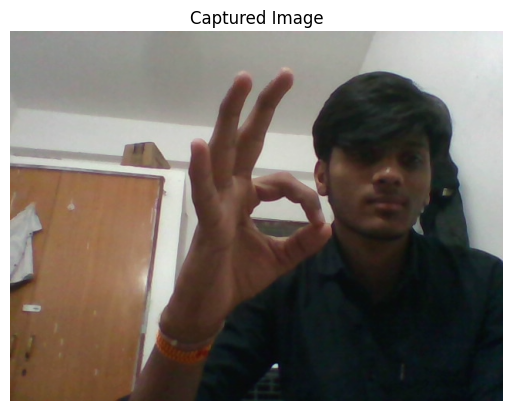

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted ASL Letter: E


In [32]:
from base64 import b64decode

# Capture image from webcam
img = capture_image()
plt.imshow(img)
plt.axis('off')
plt.title("Captured Image")
plt.show()

# Preprocess image
img = img.resize((28, 28)).convert('L')  # Grayscale
img_array = np.array(img)
img_array = img_array.reshape(1, 28, 28, 1).astype('float32') / 255.0

# Predict using CNN
prediction = cnn_model.predict(img_array)
predicted_label = np.argmax(prediction)
print(f"Predicted ASL Letter: {chr(predicted_label + 65)}")
